# Examine the records of immunization in California and the outbreak of Pertussis in more than 60 years

In [1]:
import pandas as pd 
import numpy as np 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib import pyplot as plt

pertusis = pd.read_csv("C:/Users/alcir/OneDrive/Documents/Vaccines/pertusisRates2010_2015.csv")
students = pd.read_csv("C:/Users/alcir/OneDrive/Documents/Vaccines/StudentData.csv",encoding="latin")
students.to_csv("C:/Users/alcir/OneDrive/Documents/Vaccines/NewStudentData.csv",encoding="utf-8")

studentData = pd.read_csv("C:/Users/alcir/OneDrive/Documents/Vaccines/NewStudentData.csv",index_col=0)

In [2]:
pertusis = pertusis.set_index("county")


## Take a look at the number of those exempted 
    Either for personal or medical, first start out with private schools. We can see that more students exempted out of 
    personal beliefs rather than medical

In [143]:
numPBE = sum(studentData[(studentData["schoolType"] == "PRIVATE") & (studentData["year"] == 2010)]["nPBE"])
numPME = sum(studentData[(studentData["schoolType"] == "PRIVATE") & (studentData["year"] == 2010)]["nPME"])
numPBE
numPME
studentData = studentData.rename(columns={"COUNTY": "county"})
studentData

1745

103

,schoolType,county,SCHOOL,school_code,n,nMMR,nDTP,nPolio,nPBE,nPME,year
0,PRIVATE,ALAMEDA,A CHILD'S WORLD MONTE,7092463,12,12,11,9,0,0,2000
1,PRIVATE,ALAMEDA,ACAD,6972533,15,15,15,15,0,0,2000
2,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,19,17,17,17,0,0,2009
3,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,23,6,22,23,0,0,2010
4,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,27,27,27,27,0,0,2006
...,...,...,...,...,...,...,...,...,...,...,...
116139,PUBLIC,YUBA,LONE TREE ELEMENTARY,6056832,97,86,88,86,2,0,2015
116140,PUBLIC,YUBA,WHEATLAND CHARTER ACADEMY,6118806,24,21,22,23,0,0,2015
116141,PUBLIC,YUBA,WHEATLAND ELEMENTARY,6056840,84,83,83,83,1,0,2015
116142,PUBLIC,YUBA,YUBA COUNTY SPECIAL EDUCATION,6069249,15,12,14,14,0,1,2015


## Looking at data by county
    Goal is to ultimately look at each county in California from the range of 2010 to 2015 and compare private schools vs 
    public. Then see the pertusis across California.
### Lets do a single analysis of the counties in California for private schools in the year 2010

<Figure size 720x720 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Number of counties that had at least 1 student not be vaccinated for personal belief exemption: 40


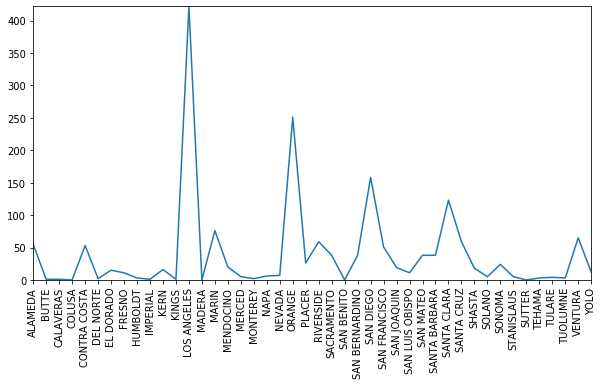

In [100]:
year2010 = studentData[(studentData["schoolType"] == "PRIVATE") & (studentData["year"] == 2010)].groupby("county")
counties = year2010[['nPBE']].sum()
plt.figure(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.margins(0)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.5)
plt.plot(counties)
print("Number of counties that had at least 1 student not be vaccinated for personal belief exemption: {}".format(len(counties[counties['nPBE']>0])))

### Now for public schools in the year 2010
    Will do the same for the years 2010 to 2014 since pertusis dataset only has the data from this year range
    Can clearly see that public schools have a higher amount of students that don't get vaccine for personal belief exemptions.
   

<Figure size 864x864 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Number of counties that had at least 1 student not be vaccinated for personal belief exemption: 57


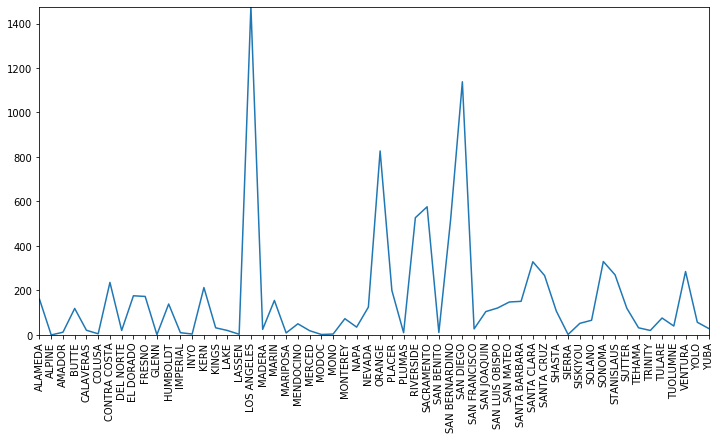

In [99]:
year2010_public = studentData[(studentData["schoolType"] == "PUBLIC") & (studentData["year"] == 2010)].groupby("county")
counties_public = year2010_public[['nPBE']].sum()
plt.figure(figsize=(12,12))
plt.xticks(rotation='vertical')
plt.margins(0)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.5)
plt.plot(counties_public)
print("Number of counties that had at least 1 student not be vaccinated for personal belief exemption: {}".format(len(counties_public[counties_public['nPBE']>0])))

### Now to look at the number of cases and rates of each county for pertussis just for the year 2010

<Figure size 864x864 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Number of counties that had at least 1 case of pertussis: 54


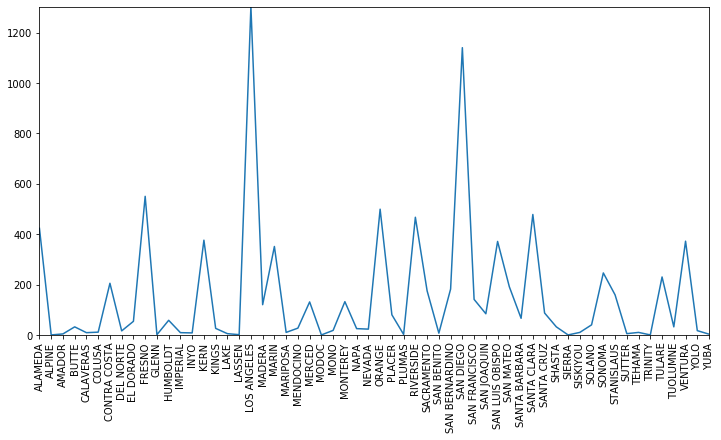

In [68]:
upd_pert = pertusis.drop(pertusis.index[0])
#upd_pert['Cases2010']
plt.figure(figsize=(12,12))
plt.xticks(rotation='vertical')
plt.margins(0)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.5)
plt.plot(upd_pert['Cases2010'])
print("Number of counties that had at least 1 case of pertussis: {}".format(len(upd_pert[upd_pert['Cases2010'] >0])))

### Head back to our original analysis of that 2010-2014 year range

,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014
nPBE,0.879882,0.910006,0.935838,0.817257,0.900281


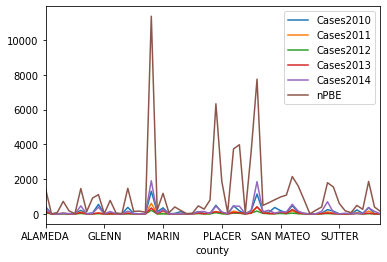

In [142]:
counts = studentData[(studentData["year"] >= 2010) & (studentData["year"] <= 2014)].groupby("county")
all_counties = counts[['nPBE']].sum()
#upd_pert[['Cases2010','Cases2011','Cases2012','Cases2013','Cases2014']]
all_= upd_pert[['Cases2010','Cases2011','Cases2012','Cases2013','Cases2014']].join(counts[['nPBE']].sum())
all_.plot()
correlation = all_.corr()[-1:]
correlation.drop('nPBE',axis =1)

### As we can see there are some similarities between each county and the previous graphs on students not vaccinated.
    It will be interesting to see the correlation between the number of cases of pertussis and those not vaccinated

In [39]:
def getCases(year,county):
    try: 
        return pertusis.loc[county,"Cases"+ str(year)],pertusis.loc[county,"Rate"+ str(year)]
    except:
        return np.NaN
getCases(2010,"YUBA")

(3, 4.15)